# <center>Описание проекта DATATON_22_boring-wozniak</center>

# Цель проекта

Мы хотим собрать информацию с разных публичных источников о вакансиях в сфере IT, связанных с наукой о данных. Основным географическим регионом будут страны ЕАС. Собирать будем вакансии по отпределенным тегам. В ходе сбора информации мы хотим оценить разные технические способы сбора из выбранных источников, чтобы посмотреть, какую информацию по рынку вакансий можно получить и какие есть сложности.

Данный проект является первым шагом в работе с данными и может расширяться как географически, так и функционально:

* мы сможем добавить больше регионов
* мы сможем смотреть динамику рынка вакансий, в дальнейшем делая срезы рынка из выбранных источников с определенной периодичностью
* мы сможем подключить базу данных для хранения информации

<img src="https://www.hillwebcreations.com/wp-content/uploads/2020/09/the-value-of-market-research-for-seo.jpg"  width="600" height="200">

# Этапы проекта:

### 1. Сбор инфорамции о вакансиях с публичных источников

#### Входные данные
Мы решили отбирать ифнормаци по тегам [Data Science, Data Analyst, Data Engineer, Machine Learning, MLOps, Аналитик данных, Инженер по данным]. Наше решение - мы собираем максимально возможное количество данных, чтобы потом решить какие из них мы будем использовать в объединенном датасете на постоянной основе. Основные источники наших данных:

* сайт [career.habr.com](https://career.habr.com) - сайт, который помогает найти работу мечты в IT. Сайт содержит более 3 340 вакансий. Для его парсинга по тегам использовался вот этот парсер [parser](https://github.com/shakhovak/DATATON_22_boring-wozniak/blob/master/parsers_used/HABR_parser.ipynb) для прохода по всем страницам сайта. С него мы получили более 1 000 вакансии для последующего объединения.

* сайт [superjob.ru](https://www.superjob.ru/) - это лучшие предложения высокооплачиваемой работы от российских и  зарубежных компаний. Собрали 20 вакансий. Данные собирали с помощью [API](https://github.com/shakhovak/DATATON_22_boring-wozniak/blob/master/parsers_used/superjob_get_data.ipynb) для этого сайта.

* сайт [rabota.ru](https://www.rabota.ru) - найдем работу за вас. Для сбора данных мы сделали [парcер](https://github.com/shakhovak/DATATON_22_boring-wozniak/blob/master/parsers_used/zarpalata_ru_api.ipynb) этого сайта на базе API. Анализ бесплатной версии API показал, что для задач дататона не получится собрать полезные данные, так как API позволяет работать с вакансиями только за последний месяц и среди них очень вакансий, связанных с ML & DS.

* [Telegram канал](https://t.me/datasciencejobs) - лучшие вакансии по Data Science, ML, CV, AI ... Для сборки использовался скраппинг на основе Selenium с помощью вот этого [парсера](https://github.com/shakhovak/DATATON_22_boring-wozniak/blob/master/parsers_used/telegram-scrapper.ipynb). С него мы получили несколько более 800 вакансий.

* сайт [hh.ru](https://hh.ru) - один из самых популярных источников вакансий. Мы использовали API для этого сайта и с помощью парсера получили почти 1000 вакансий.

#### Основные выводы по этапу

* (+) Более структурированные данные удается получить с помощью API, поэтому этот источник является предпочтительным
* (-) Бесплатные версии API есть не у всех сайтов и имеют ограничения либо на объем выгрузок, либо на интервалы 
* (-) Создание специлизированных скрапперов зависит от структуры сайта и не совсем подходит для систематического сбора информации и для маштабирования проекта
* (+) Информация с Telegram-канала получается стабильно, но менее структурирована

Итак, основным способом сбора информации на систематической основе должен быть API и, к сожалению, желательно платная версия.

### 2. Объединение собранных данных.

По итогам предыдущего этапа мы 5 датасетов данных, которые модно посмотреть на [Github](https://github.com/shakhovak/DATATON_22_boring-wozniak/tree/master/raw_data). После анализа структуры всех данных мы выявили несколько общих характеристик и решили оставить их в объединенном файле:

* **company** - работодатель
* **position** - название позиции
* **location** - место работы
* **format** - удаленный, в офисе или гибридный
* **salary** - уровень заработной платы
* **schedule** - график работы
* **level** - уровень потенциального сотрудника 
* **techstack** - ключевые навыки
* **date_publish** - дата публикации
* **source_id** - источник информации

По итогам объединения получился [датасет](https://drive.google.com/file/d/1TcWn-SIgbqQWkn2sNpWR1jMOIf5qhfvb/view?usp=sharing) в 5990 строк, представленный ниже.

In [1]:
import pandas as pd
df = pd.read_csv('data/agg_data.csv')
df.head(10)

,company,position,location,schedule,responsibilities,requirements,levels,techstack,source,date_publish,format,salary,currency
0,Сбербанк,Аналитик данных,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['sql', 'python', 'oracle', 'субд', 'greenplum...",superjob.ru,2022-12-25 10:50:27,Не имеет значения,Договорная,RUB
1,Friendwork,Data Engineer (remote),Москва,Полный рабочий день,не определено,не определено,От 3 лет,"['sql', 'python', 'postgresql', 'spark', 'dock...",superjob.ru,2022-12-19 00:00:00,Удалённая работа (на дому),Договорная,RUB
2,Технопарк «Сколково»,Teamlead проекта,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'data science', 'bi', 'ios', 'c', '...",superjob.ru,2022-12-19 11:01:29,Не имеет значения,Договорная,RUB
3,Технопарк «Сколково»,Frontend-разработчик,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'data science', 'bi', 'ios', 'c', '...",superjob.ru,2022-12-19 10:58:50,Не имеет значения,Договорная,RUB
4,Технопарк «Сколково»,Backend-разработчик,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'data science', 'bi', 'ios', 'c', '...",superjob.ru,2022-12-19 10:54:29,Не имеет значения,Договорная,RUB
5,Технопарк «Сколково»,Lead Machine Learning,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['ml', 'data mining', 'data science', 'nlp', '...",superjob.ru,2022-12-20 05:34:14,Не имеет значения,Договорная,RUB
6,Friendwork,Data-analysis-разработчик,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'data analysis', 'data science', 'b...",superjob.ru,2022-12-19 00:00:00,Не имеет значения,Договорная,RUB
7,Южный федеральный университет,"Data Scientist (computer vision, machine learn...",Ростов-на-Дону,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'java', 'анализ данных', 'pandas', ...",superjob.ru,2022-12-23 06:07:13,Не имеет значения,55000,RUB
8,Армтек,Специалист в отдел экспедиции / Аналитик данных,Мытищи,Полный рабочий день,не определено,не определено,Без опыта,"['c', 'r', 'sap', 'ms office', 'office', 'exce...",superjob.ru,2022-12-25 08:11:46,Не имеет значения,Договорная,RUB
9,Технопарк «Сколково»,Data Scientist,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['sql', 'python', 'ml', 'data science', 'c', '...",superjob.ru,2022-12-25 10:43:16,Удалённая работа (на дому),Договорная,RUB


#### Основные выводы по этапу

Использование разных источников информации приводит к тому, что данные не всегда соответсвут друг другу. Нам пришлось отбросить сущетсвенную часть собранных данных, чтобы получить общий датасет (например, описания вакансий и компенсационного пакета). Для дальнейшего развития проекта списко полей лучше пресмотреть, чтобы включить и эту информацию.


### 3. Краткий анализ собранных данных.

На этом этапе мы хотим посмотреть, что нам демонстрируют собранные характеристика рынка вакансий и какие выводы можно будет по ним делать, когда проект будет масштабироваться и наполняться данными.

По каждому блоку мы делали анализ в **отдельном** ноутбуке и в итоговом файле суммировали наши находки. Все ссылки на ноубуке будут в соответсвующих блоках.


#### 3.1 Анализируем даты

Первым шагом, посмотрим, за какие периоды мы собрали данные и какие их них являтся максимально репрезентативными для аналитики рынка. Детали анализа представлены в нотубуке и на графиках ниже. 


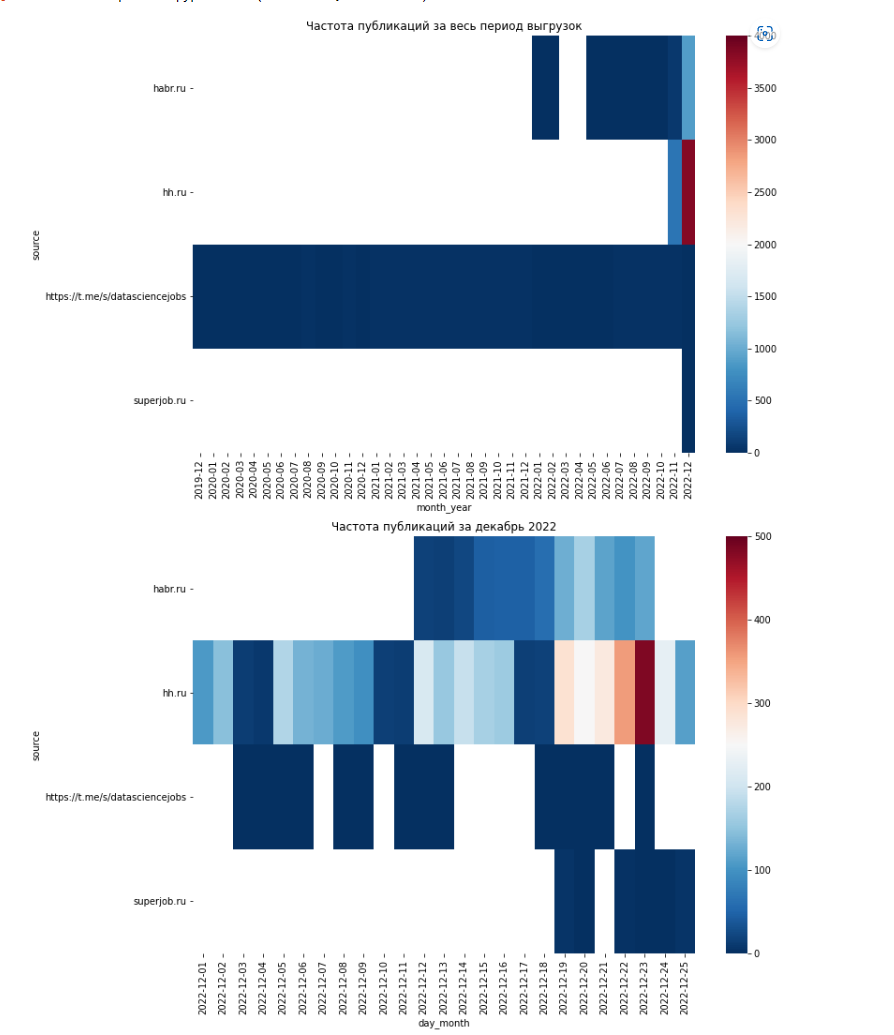


Итак, если смотреть по источникам, то максимально стабильная информация идет из Telegam, но в целом данные репрезентативны только в декабре и основными источниками являтся habr.ru и hh.ru, причем последний с большим отрывом

#### 3.2 Анализируем географию

В большинстве вакансий указаны города с местом работы, мы рассмотрели детально разбивку по городам (ноубук с кодом) и в принципе 
сюрпириза не получили: основные города-притяжения дата-сайнтистов - Москва и Санкт-Петербург, где более 500 вакансий. В то время, как в остальных городах количество вакансий менее 250.

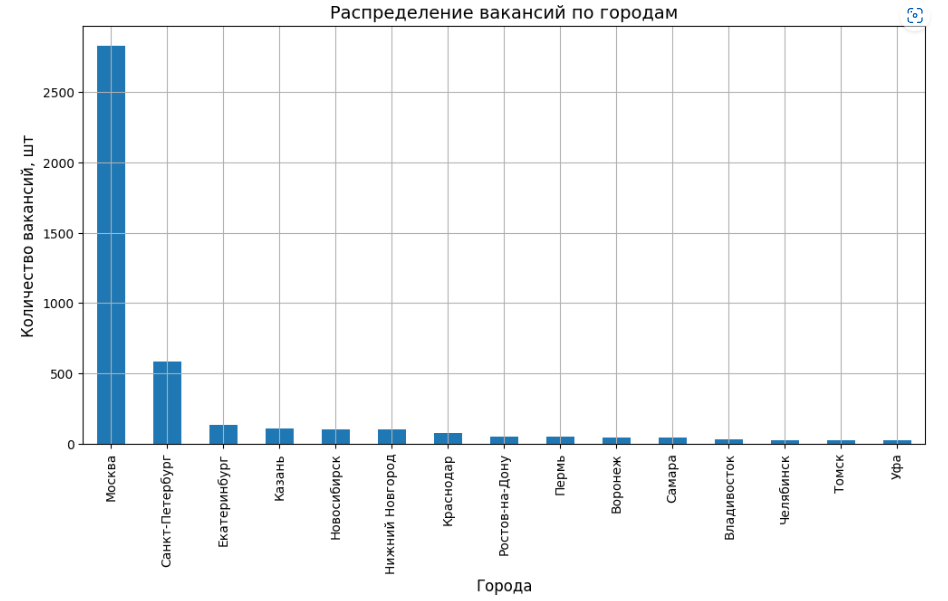


Следущие два графика дополняют друг друга, в них лидирует Москва как по формату вакансий, так и режимам работы
В других городах в основном, компании предпочитают чтобы сотрудники работали на полную ставку в офисе.


<table>

  <tr>
    <td>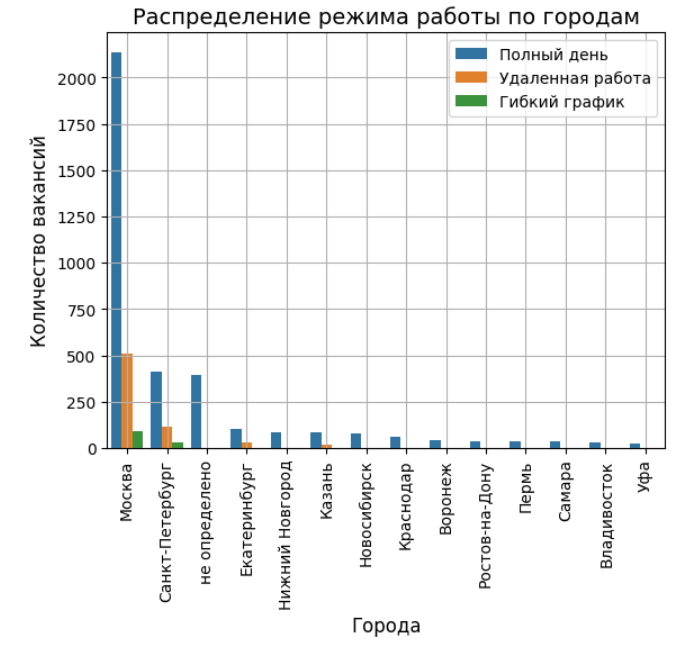</td>
    <td>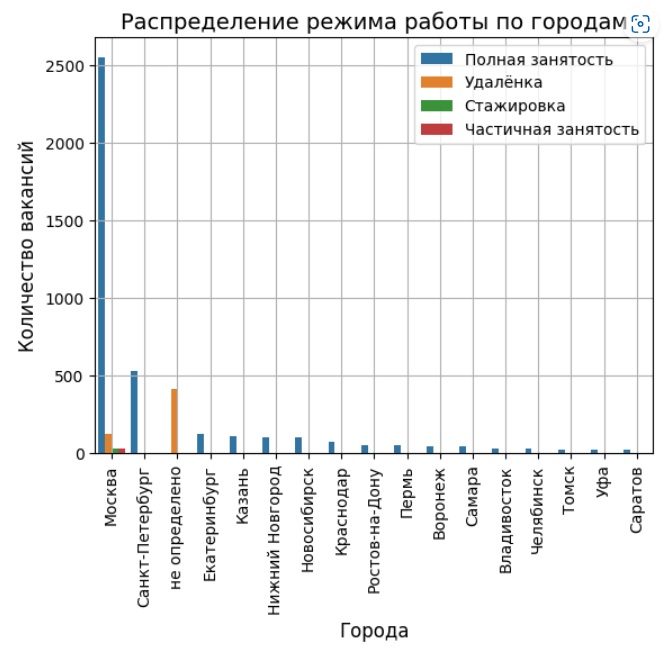</td>
  </tr>
 </table>


#### 3.3 Анализируем требуемые навыки

Нам было также интересно посомтреть, какие навыки работодатели считают ключевыми (в подавлящем большинстве вакансий эти навыки указыны). Также направленность навыков отражается и в названии вакансии. В ноутбуке по ссылке мы проанализировали частоту появления слов как в описании навыков в вакансиях, так и в самом названии.

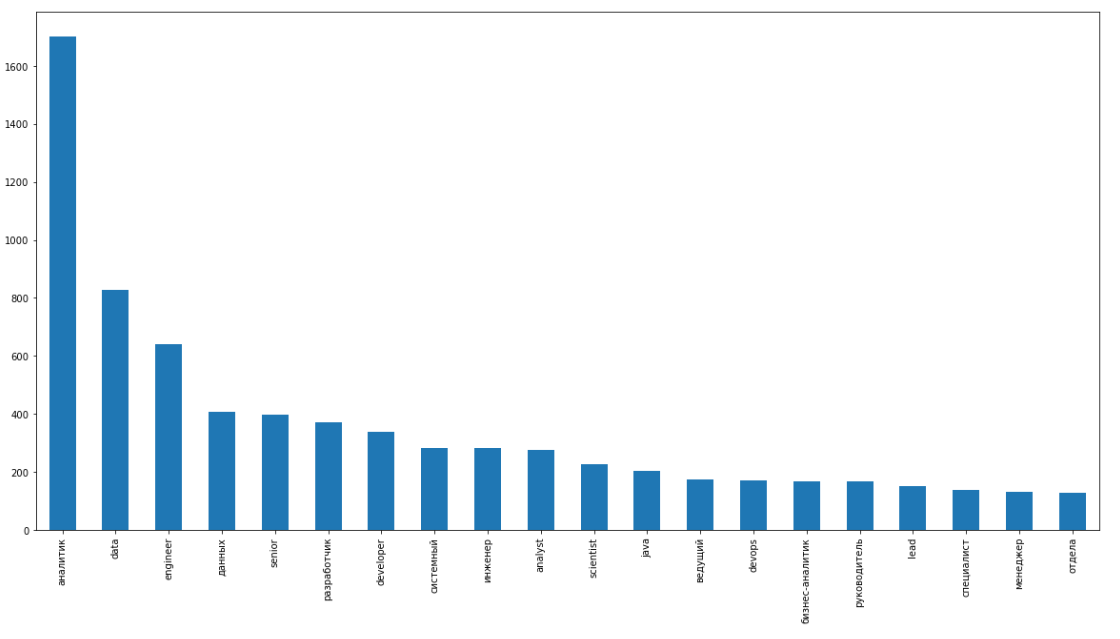


Итак, от сотрудников, связанных с наукой о данных ждут прежде всего аналитики (топ-1) данных (топ-2). Интересно, что на 5-м месте оказалось слово 'senior', что вероятно говорит о неком дефиците специалистов этого уровня.

Если же посмотреть на топ-3 навыка разных уровней, то мы наблдаем удивительное однообразие: основными являются заниание питона и sql


<table>
  <tr>
    <td>Junior</td>
     <td>Middle</td>
     <td>Senior</td>
     <td>Lead</td>
  </tr>
  <tr>
    <td>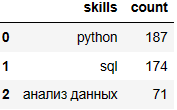</td>
    <td>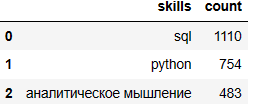</td>
    <td>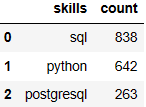</td>
    <td>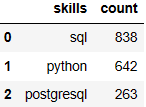</td>
      
  </tr>
 </table>

#### 3.4 Анализ уровня заработной платы

Анализ заработной платы усложняется тем, что в большинстве случаев работодатели не указывают ее уровня, таким образом мы работали с достаточно ограниченным набором данных.